# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
from newsapi import NewsApiClient

%matplotlib inline

load_dotenv()

True

In [2]:
# Read your api key environment variable
api_key = os.getenv('NEWS_API')


In [3]:
# Create a newsapi client
newsapi = NewsApiClient(api_key)


In [4]:
# Fetch the Bitcoin news articles
bitcoin_news = newsapi.get_everything(q='Bitcoin', language='en')


In [5]:
# Fetch the Ethereum news articles
ethereum_news = newsapi.get_everything(q='Ethereum', language='en')


In [6]:
# Create the Bitcoin sentiment scores DataFrame

# Create defined function to capture sentiment scores
def create_sentiment_scores_dataframe(news_headlines):
    '''Capture sentiment scores from news headlines.
    Arguments: 
        news_headlines (dict of dict): Dictionary of dictionaries from NewsApiClient
    Returns:
        A dataframe of sentiment scores with matching article text
    '''

    # Instantiate sentimate list
    news_sentiments = []

    # Loop through news headlines for each article
    for article in news_headlines['articles']:
        try:
            # Assign specific features of each article
            text = article['content']
            sentiment = analyzer.polarity_scores(text)
            compound = sentiment['compound']
            negative = sentiment['neg']
            neutral = sentiment['neu']
            positive = sentiment['neg']

            # Append each articles sentiment scores to a list
            news_sentiments.append({
                'Compound': compound,
                'Negative': negative,
                'Neutral': neutral,
                'Positive': positive,
                'Text': text
            })

        except AttributeError:
            pass

    # Create dataframe
    news_sentiment_df = pd.DataFrame(news_sentiments)

    # Return dataframe
    return news_sentiment_df

bitcoin_df = create_sentiment_scores_dataframe(bitcoin_news)
bitcoin_df.head()


,Compound,Negative,Neutral,Positive,Text
0,-0.6705,0.199,0.737,0.199,A former Microsoft software engineer from Ukra...
1,0.6369,0.000,0.838,0.000,Visa has partnered with cryptocurrency startup...
2,0.2144,0.000,0.947,0.000,PayPal is bringing its newly-announced support...
3,0.2023,0.000,0.950,0.000,"In November 2017, after an absolutely massive,..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent..."


In [7]:
# Create the ethereum sentiment scores DataFrame
ethereum_df = create_sentiment_scores_dataframe(ethereum_news)
ethereum_df.head()


,Compound,Negative,Neutral,Positive,Text
0,0.2144,0.0,0.947,0.0,PayPal is bringing its newly-announced support...
1,0.0000,0.0,1.000,0.0,FILE PHOTO: Representation of the Ethereum vir...
2,0.0000,0.0,1.000,0.0,FILE PHOTO: Representation of the Ethereum vir...
3,0.4215,0.0,0.912,0.0,LONDON (Reuters) - Digital currencies Ethereum...
4,0.8779,0.0,0.682,0.0,"PayPal has launched the Generosity Network, a ..."


In [8]:
# Describe the Bitcoin Sentiment
bitcoin_df.describe()


,Compound,Negative,Neutral,Positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.097426,0.029000,0.915053,0.029000
std,0.385218,0.066381,0.098736,0.066381
min,-0.670500,0.000000,0.716000,0.000000
25%,0.000000,0.000000,0.833500,0.000000
50%,0.000000,0.000000,0.950000,0.000000
75%,0.308150,0.000000,1.000000,0.000000
max,0.765000,0.215000,1.000000,0.215000


In [9]:
# Describe the Ethereum Sentiment
ethereum_df.describe()


,Compound,Negative,Neutral,Positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.153245,0.021050,0.914650,0.021050
std,0.339247,0.054473,0.104806,0.054473
min,-0.493900,0.000000,0.672000,0.000000
25%,0.000000,0.000000,0.876000,0.000000
50%,0.000000,0.000000,0.932000,0.000000
75%,0.430825,0.000000,1.000000,0.000000
max,0.877900,0.196000,1.000000,0.196000


### Questions:

Q: Which coin had the highest mean positive score?

A: Bitcoin has the highest mean positive score: 0.029000.

Q: Which coin had the highest compound score?

A: Ethereum has the highest compound score, max: 0.877900.

Q. Which coin had the highest positive score?

A: Bitcoin has the highest positive score, max: 0.215000.


---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [10]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [11]:
# Expand the default stopwords list if necessary
sw_add_ons = {'', 'chars', 'char', 'volod', 'ruvic', 'reutersdado', 'dado', 'ruvic', 'ruvicillustration', 'volod', 'la', 'im', 'drin', 'wa', 'ha', 'ruvicillustrationfile', 'file', 'photo', 'reuters', 'staff'}


In [12]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
    # Create a list of the words
    words_tokened = word_tokenize(text)

    # Convert the words to lowercase
    words_lowered = [word.lower() for word in words_tokened]

    # Remove the punctuation
    regex = re.compile('[^a-zA-Z]')
    words_regexed = [regex.sub('', word) for word in words_lowered]
    
    # Remove the stop words
    sw = set(stopwords.words('english'))
    stopwords_removed = [word.lower() for word in words_regexed if word not in sw.union(sw_add_ons)]

    # Lemmatize Words into root words
    lemmatizer = WordNetLemmatizer()
    tokens = [lemmatizer.lemmatize(word) for word in stopwords_removed]

    return tokens


In [13]:
# Create a new tokens column for bitcoin
bitcoin_tokens = [tokenizer(headline) for headline in bitcoin_df['Text']]
bitcoin_df['Tokens'] = bitcoin_tokens
bitcoin_df.head()


,Compound,Negative,Neutral,Positive,Text,Tokens
0,-0.6705,0.199,0.737,0.199,A former Microsoft software engineer from Ukra...,"[former, microsoft, software, engineer, ukrain..."
1,0.6369,0.000,0.838,0.000,Visa has partnered with cryptocurrency startup...,"[visa, partnered, cryptocurrency, startup, blo..."
2,0.2144,0.000,0.947,0.000,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
3,0.2023,0.000,0.950,0.000,"In November 2017, after an absolutely massive,...","[november, absolutely, massive, twomonth, rall..."
4,0.0000,0.000,1.000,0.000,"Unlike ‘conventional’ cryptocurrencies, a cent...","[unlike, conventional, cryptocurrencies, centr..."


In [14]:
# Create a new tokens column for ethereum
ethereum_tokens = [tokenizer(headline) for headline in ethereum_df['Text']]
ethereum_df['Tokens'] = ethereum_tokens
ethereum_df.head()


,Compound,Negative,Neutral,Positive,Text,Tokens
0,0.2144,0.0,0.947,0.0,PayPal is bringing its newly-announced support...,"[paypal, bringing, newlyannounced, support, cr..."
1,0.0000,0.0,1.000,0.0,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
2,0.0000,0.0,1.000,0.0,FILE PHOTO: Representation of the Ethereum vir...,"[representation, ethereum, virtual, currency, ..."
3,0.4215,0.0,0.912,0.0,LONDON (Reuters) - Digital currencies Ethereum...,"[london, digital, currency, ethereum, xrp, soa..."
4,0.8779,0.0,0.682,0.0,"PayPal has launched the Generosity Network, a ...","[paypal, launched, generosity, network, platfo..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [15]:
from collections import Counter
from nltk import ngrams


In [16]:
# Generate the Bitcoin N-grams where N=2
# Create big string of bitcoin words from all tokens
def join_df_column_to_string(dataframe_column):
    '''Joins dataframe column of strings and returns one big string.'''
    new_big_string = [' '.join(item) for item in dataframe_column]
    return new_big_string

# Created custom function to get bigrams
def get_bigrams(big_string):
    # Run tokenizer to clean data
    processed = tokenizer(str(big_string))

    # Create bigrams list
    bigrams = ngrams(processed, n=2)

    # Return bigrams
    return bigrams

# Join dataframe columns to string
bitcoin_big_string = join_df_column_to_string(bitcoin_df['Tokens'])

# Create bigrams
bitcoin_bigrams = get_bigrams(bitcoin_big_string)

# Get top 20 bigrams and display to screen
bitcoin_frequency = Counter(bitcoin_bigrams).most_common(20)
bitcoin_frequency


[(('virtual', 'currency'), 5),
 (('representation', 'virtual'), 4),
 (('currency', 'bitcoin'), 4),
 (('illustration', 'taken'), 4),
 (('former', 'microsoft'), 2),
 (('microsoft', 'software'), 2),
 (('software', 'engineer'), 2),
 (('engineer', 'ukraine'), 2),
 (('ukraine', 'sentenced'), 2),
 (('sentenced', 'nine'), 2),
 (('nine', 'year'), 2),
 (('year', 'prison'), 2),
 (('prison', 'stealing'), 2),
 (('stealing', 'million'), 2),
 (('million', 'store'), 2),
 (('store', 'credit'), 2),
 (('credit', 'microsoft'), 2),
 (('microsoft', 'online'), 2),
 (('poster', 'participating'), 2),
 (('bitcoin', 'seen'), 2)]

In [17]:
# Generate the Ethereum N-grams where N=2
# Create big string of ethereum words from all tokens
ethereum_big_string = join_df_column_to_string(ethereum_df['Tokens'])

ethereum_bigrams = get_bigrams(ethereum_big_string)

ethereum_frequency = Counter(ethereum_bigrams).most_common(20)
ethereum_frequency


[(('virtual', 'currency'), 9),
 (('representation', 'virtual'), 6),
 (('currency', 'bitcoin'), 6),
 (('illustration', 'taken'), 6),
 (('seen', 'illustration'), 5),
 (('bitcoin', 'seen'), 5),
 (('taken', 'november'), 5),
 (('representation', 'ethereum'), 3),
 (('ethereum', 'virtual'), 3),
 (('november', 'new'), 3),
 (('new', 'york'), 3),
 (('currency', 'standing'), 2),
 (('standing', 'pc'), 2),
 (('pc', 'motherboard'), 2),
 (('motherboard', 'seen'), 2),
 (('illustration', 'picture'), 2),
 (('picture', 'february'), 2),
 (('february', 'london'), 2),
 (('seen', 'front'), 2),
 (('front', 'stock'), 2)]

In [18]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)


In [19]:
# Get the top 10 words for Bitcoin
bitcoin_big_string = ' '.join(bitcoin_df['Text'])
bitcoin_words_tokened = tokenizer(bitcoin_big_string)
bitcoin_word_count = token_count(bitcoin_words_tokened)
bitcoin_word_count


[('bitcoin', 13),
 ('currency', 6),
 ('cryptocurrency', 5),
 ('representation', 5),
 ('virtual', 5),
 ('illustration', 5),
 ('taken', 5),
 ('microsoft', 4),
 ('u', 4),
 ('november', 4)]

In [20]:
# Get the top 10 words for Ethereum
ethereum_big_string = ' '.join(ethereum_df['Text'])
ethereum_words_tokened = tokenizer(ethereum_big_string)
ethereum_word_count = token_count(ethereum_words_tokened)
ethereum_word_count


[('bitcoin', 15),
 ('currency', 10),
 ('representation', 9),
 ('virtual', 9),
 ('illustration', 8),
 ('seen', 7),
 ('taken', 7),
 ('ethereum', 6),
 ('november', 6),
 ('cryptocurrency', 5)]

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

(-0.5, 399.5, 199.5, -0.5)

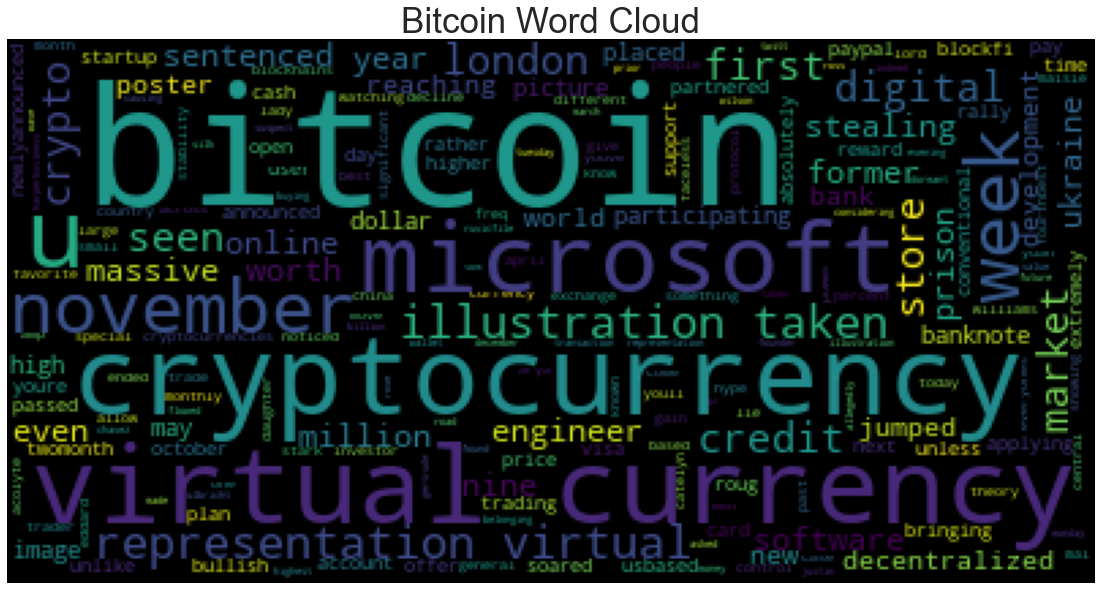

In [22]:
# Generate the Bitcoin word cloud
bitcoin_words_joined = ' '.join(bitcoin_words_tokened)
wc = WordCloud().generate(bitcoin_words_joined)
plt.imshow(wc)
plt.title('Bitcoin Word Cloud',
    fontdict={'size': 35},
    loc='Center'
)
plt.axis('off')


(-0.5, 399.5, 199.5, -0.5)

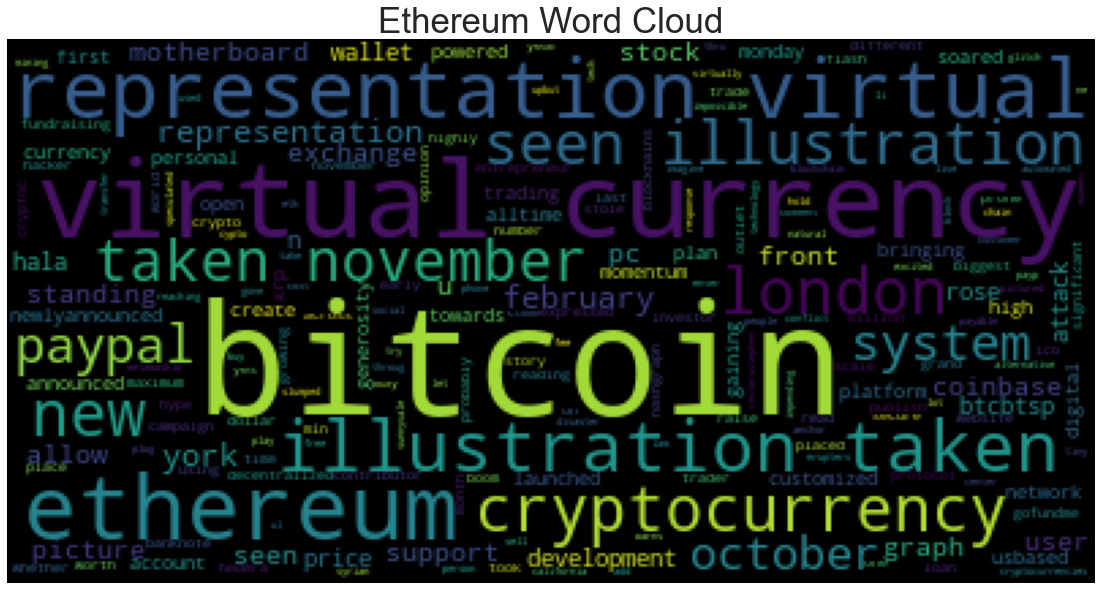

In [23]:
# Generate the Ethereum word cloud
ethereum_words_joined = ' '.join(ethereum_words_tokened)
wc = WordCloud().generate(ethereum_words_joined)
plt.imshow(wc)
plt.title('Ethereum Word Cloud',
    fontdict={'size': 35},
    loc='Center'
)
plt.axis('off')


# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [24]:
import spacy
from spacy import displacy


In [25]:
# Optional - download a language model for SpaCy
# !python -m spacy download en_core_web_sm


In [26]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')


## Bitcoin NER

In [27]:
# Concatenate all of the bitcoin text together
bitcoin_big_string


"A former Microsoft software engineer from Ukraine has been sentenced to nine years in prison for stealing more than $10 million in store credit from Microsoft's online store. From 2016 to 2018, Volod… [+3307 chars] Visa\xa0has partnered with cryptocurrency startup BlockFi to offer the first rewards credit card that pays out in Bitcoin rather than cash, but is it worth applying for? Unless youre extremely bullish o… [+2239 chars] PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] In November 2017, after an absolutely massive, two-month rally, Bitcoin passed $10,000 for the first time. And then, over the next 20 days, it soared even higher, reaching a price of $19,665 and roug… [+6738 chars] Unlike ‘conventional’ cryptocurrencies, a central bank controls digital yuan — in this case, the People’s Bank of China. The move gives t

In [28]:
# Run the NER processor on all of the text
bitcoin_ner_doc = nlp(bitcoin_big_string)

# Add a title to the document
bitcoin_ner_doc.user_data['title'] = 'Bitcoin NER'


In [29]:
# Render the visualization
displacy.render(bitcoin_ner_doc, style='ent')


In [30]:
# List all Entities
for ent in bitcoin_ner_doc.ents:
    print(ent.text, ent.label_)

Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
2016 to 2018 DATE
Visa ORG
first ORDINAL
Bitcoin GPE
PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
November 2017 DATE
two-month DATE
Bitcoin GPE
10,000 MONEY
first ORDINAL
the next 20 days DATE
19,665 MONEY
digital yuan ORG
the People’s Bank of China ORG
the past few weeks DATE
bitcoin GPE
digital ORG
hype GPE
Decentralized GPE
4 CARDINAL
U.S. GPE
November DATE
today DATE
500 CARDINAL
10.8 percent PERCENT
November DATE
monthly DATE
April DATE
fourth ORDINAL
Maisie Williams PERSON
Arya Stark PERSON
Lady Catelyn PERSON
Eddard PERSON
acolyte PERSON
the Faceless Men WORK_OF_ART
Monday DATE
$1 billion MONEY
Silk Road ORG
Ross Ulbricht PERSON
this week DATE
1 CARDINAL
1 CARDINAL
Microsoft ORG
Ukraine GPE
nine years DATE
more than $10 million MONEY
Microsoft ORG
8 CARDINAL
7 CARDINAL
Bitcoin GPE
above $18,000 MONEY
Tuesday DATE
evening TIME
December 2017 DATE
this week DATE
more than $18,000 MONEY
Bi

---

## Ethereum NER

In [31]:
# Concatenate all of the bitcoin text together
ethereum_big_string


"PayPal is bringing its newly-announced support for cryptocurrency to all US accounts. It first announced plans to open cryptocurrency trading to US-based users in October, but until now it was only a… [+589 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] FILE PHOTO: Representation of the Ethereum virtual currency standing on the PC motherboard is seen in this illustration picture, February 3, 2018. REUTERS/Dado Ruvic/Illustration\r\nLONDON (Reuters) - … [+1237 chars] LONDON (Reuters) - Digital currencies Ethereum and XRP soared on Monday, gaining momentum as bitcoin powered on towards its all-time high.\r\nFILE PHOTO: Representation of the Ethereum virtual currency… [+1950 chars] PayPal has launched the Generosity Network, a platform that allows users to create customized, personal fundraising campaigns. Yes, ju

In [32]:
# Run the NER processor on all of the text
ethereum_ner_doc = nlp(ethereum_big_string)

# Add a title to the document
ethereum_ner_doc.user_data['title'] = 'Ethereum NER'


In [33]:
# Render the visualization
displacy.render(ethereum_ner_doc, style='ent')


In [34]:
# List all Entities
for ent in ethereum_ner_doc.ents:
    print(ent.text, ent.label_)


PayPal PRODUCT
US GPE
first ORDINAL
US GPE
October DATE
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
February 3, 2018 DATE
REUTERS/ ORG
Reuters ORG
LONDON GPE
Reuters ORG
XRP ORG
Monday DATE
PayPal PERSON
the Generosity Network ORG
20,000 MONEY
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
The New York Times ORG
Coinbase ORG
early February this year DATE
last month DATE
October DATE
$24 million MONEY
November DATE
8 DATE
2020 DATE
5 CARDINAL
ICO ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
Reuters ORG
Reuters ORG
Bitcoin GPE
November 19, 2020 DATE
REUTERS/ ORG
LONDON GPE
Reuters ORG
Bitcoin GPE
Reuters ORG
Bitcoin GPE
U.S. GPE
May 26, 2020 DATE
REUTERS/ ORG
Reuters ORG
Hala Systems ORG
Hedera ORG
Syrians NORP
Hala Systems ORG
Paypal PERSON
1 CARDINAL
Bitcoin GPE
Ethereum GPE
bitcoin GPE
Payp PERSON
Bitcoin GPE